###Importing

In [73]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans

In [74]:
# prompt: import skopt

!pip install scikit-optimize

import skopt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer



##2

In [46]:
!pip install sdv
!pip install sdv[tabular] # Install the 'tabular' submodule along with 'sdv'
!pip install ctgan


In [72]:
import pandas as pd

# Load the dataset
file_path = 'Classification_Test_file.csv'
data = pd.read_csv(file_path)

# Train CTGAN model
model = CTGAN()
model.fit(data)

# Generate synthetic data
synthetic_data = model.sample(20000)

# Save synthetic data to a new file
synthetic_file_path = 'Synthetic_Classification_Test_file.csv'
synthetic_data.to_csv(synthetic_file_path, index=False)

print(f"Synthetic data has been generated and saved to {synthetic_file_path}")


Synthetic data has been generated and saved to Synthetic_Classification_Test_file.csv


In [48]:
synthetic_data.shape

(20000, 30)

##1. Preprocessing and Feature Engineering


> Add blockquote




In [49]:
df = synthetic_data


In [50]:
data=df.copy()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,109487,-0.795396,-0.276005,0.045487,-2.241865,-3.759942,-2.272043,0.379584,7.832954,-6.821351,...,-0.174000,3.630986,-0.816842,0.874192,0.639852,0.669760,-0.318694,-0.547992,0.102713,-22.167814
1,23510,1.420181,6.356315,1.789676,11.075462,-1.224899,-3.753111,-1.325053,-0.612398,0.067365,...,-0.444527,0.491387,-0.073089,-0.179182,-0.872413,-0.399319,0.395219,0.247718,-0.393567,-0.926214
2,1019,-18.539338,-0.662789,-0.934316,12.552231,-1.127184,-1.776840,-0.488903,1.189310,-3.088642,...,0.091579,0.087156,-0.308129,-0.102004,0.610369,-0.295807,0.265983,-0.167203,0.039979,-7.269636
3,127811,-3.220115,21.131498,2.647907,5.054865,-0.133213,-1.997813,-0.218065,1.084355,-2.409738,...,-0.356470,0.989174,-1.212641,0.006114,0.310313,-0.188363,-0.237852,-0.376625,0.760982,-47.660122
4,163301,2.755648,-0.056489,-2.008734,10.241251,2.776925,-5.275081,-0.392352,0.085436,-9.263692,...,-0.800088,0.823493,1.050290,-0.263085,1.064281,0.612354,-0.033021,-0.089478,-0.126818,1786.114871


In [51]:




x = data


kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 500, random_state = 10)
kmeans.fit(x)

KMeans(init='random', max_iter=500, n_clusters=2, random_state=10)

In [52]:
df.fillna(data.mean(), inplace=True)

In [53]:
# Display teh model's famous attributes
print(kmeans.cluster_centers_)
print(np.unique(kmeans.labels_))
print(kmeans.inertia_)

[[ 9.34417840e+03 -1.85906141e+00 -7.99068666e-02 -3.47264864e+00
   3.63199426e+00 -6.91500739e-01 -2.14319600e+00 -6.76746377e+00
   3.06096043e+00 -3.52922356e+00 -6.26427463e+00  2.20953699e+00
  -4.25756293e+00 -7.02659364e-01 -6.53923756e-01 -2.85739423e-01
  -2.39541650e+00 -3.28023282e+00 -1.27247604e-01  1.41203735e+00
  -6.00205494e-01  9.81844450e-01 -7.49380292e-01  9.18924195e-02
   3.93836323e-01  4.61475544e-01 -1.14627395e-01 -6.68960753e-01
   1.30024949e-01  6.99686889e+01]
 [ 9.39450945e+04 -1.78261956e+00  8.17651881e-02 -3.34394597e+00
   3.56572985e+00 -7.17206146e-01 -2.16337979e+00 -6.72956115e+00
   3.04860313e+00 -3.55916257e+00 -6.11204777e+00  2.11823023e+00
  -4.52889560e+00 -7.48885243e-01 -7.85484310e-01 -2.67941291e-01
  -2.41911884e+00 -2.97167993e+00 -1.44059268e-01  1.46861770e+00
  -5.86125590e-01  9.96388494e-01 -7.86976212e-01  1.44810950e-01
   3.92817158e-01  4.43004268e-01 -1.02239011e-01 -6.32623789e-01
   1.11992328e-01  7.23638057e+01]]
[0 1]

In [54]:

df['cluster'] = kmeans.labels_


In [55]:
# df.drop('cluster', axis=1, inplace=True)

In [56]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,109487,-0.795396,-0.276005,0.045487,-2.241865,-3.759942,-2.272043,0.379584,7.832954,-6.821351,...,3.630986,-0.816842,0.874192,0.639852,0.669760,-0.318694,-0.547992,0.102713,-22.167814,1
1,23510,1.420181,6.356315,1.789676,11.075462,-1.224899,-3.753111,-1.325053,-0.612398,0.067365,...,0.491387,-0.073089,-0.179182,-0.872413,-0.399319,0.395219,0.247718,-0.393567,-0.926214,0
2,1019,-18.539338,-0.662789,-0.934316,12.552231,-1.127184,-1.776840,-0.488903,1.189310,-3.088642,...,0.087156,-0.308129,-0.102004,0.610369,-0.295807,0.265983,-0.167203,0.039979,-7.269636,0
3,127811,-3.220115,21.131498,2.647907,5.054865,-0.133213,-1.997813,-0.218065,1.084355,-2.409738,...,0.989174,-1.212641,0.006114,0.310313,-0.188363,-0.237852,-0.376625,0.760982,-47.660122,1
4,163301,2.755648,-0.056489,-2.008734,10.241251,2.776925,-5.275081,-0.392352,0.085436,-9.263692,...,0.823493,1.050290,-0.263085,1.064281,0.612354,-0.033021,-0.089478,-0.126818,1786.114871,1


In [57]:
X = df.drop('cluster', axis=1)
y = df['cluster']

In [58]:
df.duplicated().sum()

0

In [59]:
df.drop_duplicates(inplace=True)

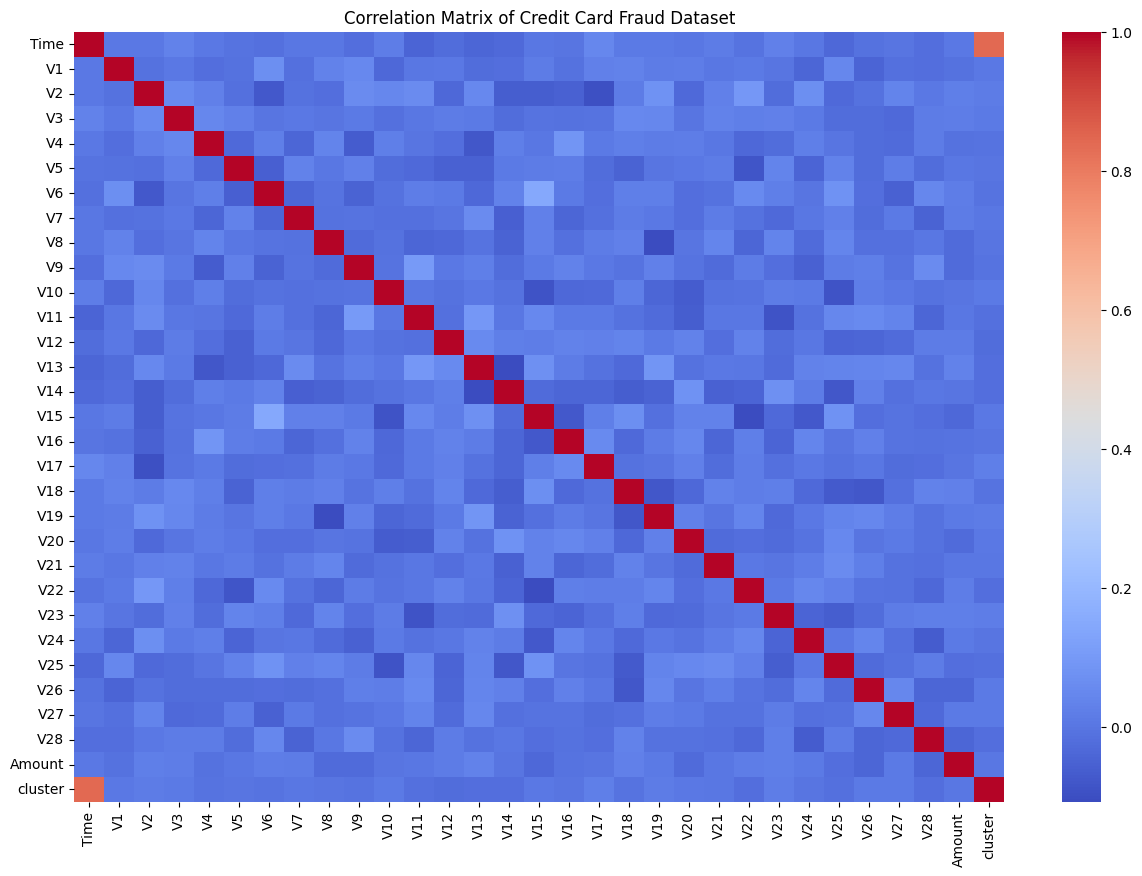

In [60]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Fraud Dataset")
plt.show()

In [61]:
y.value_counts()

,count
cluster,
1,11454
0,8546


In [62]:
# df['cluster'] = df['cluster'].astype(int)

In [63]:
# # Ensure 'Class' is of integer type before assigning it to y
# df['Class'] = df['Class'].astype(int)
# X = df.drop('Class', axis=1)
# y = df['Class']  # Re-assign y after type conversion

# # Now proceed with SMOTE
# # Set k_neighbors to a value less than or equal to the smallest minority class size
# # Since n_samples_fit = 3, k_neighbors should be <= 3

# # Calculate the number of samples in the minority class
# minority_class_samples = y.value_counts().min()

# # Set k_neighbors to a value less than or equal to the minority class samples
# k_neighbors_value = min(3, minority_class_samples -1 )  # Subtracting 1 to avoid issues for very few minority samples.
# #If k_neighbors_value is 0 then set it to 1
# k_neighbors_value = max(1,k_neighbors_value)

# smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)  # Changed k_neighbors dynamically
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [64]:
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
# print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

In [65]:
# print(f"After SMOTE: \n{y_train.value_counts()}")

##Augmented Data

In [66]:



# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Synthetic Data Generation using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Data Augmentation (Adding Gaussian Noise)
def augment_data(X, y):
    augmented_X, augmented_y = [], []
    augmenter = A.Compose([
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.5)
    ])
    for i in range(len(X)):
        augmented = augmenter(image=X[i])
        augmented_X.append(augmented['image'])
        augmented_y.append(y[i])
    return np.array(augmented_X), np.array(augmented_y)

In [67]:
def augment_data(X, y):
    """
    Augments tabular data by adding Gaussian noise and scaling/shifting features.

    Args:
        X: NumPy array of features.
        y: NumPy array of target labels.

    Returns:
        NumPy arrays of augmented features and target labels.
    """
    augmented_X = X.copy()  # Create a copy to avoid modifying original data
    # Add Gaussian noise to numerical features
    noise = np.random.normal(loc=0, scale=0.1, size=augmented_X.shape)  # Adjust scale as needed
    augmented_X += noise

    return augmented_X, y

In [68]:
# Apply Data Augmentation
X_augmented, y_augmented = augment_data(X_resampled, y_resampled)

# Combine original and augmented data
X_combined = np.vstack((X_resampled, X_augmented))
y_combined = np.hstack((y_resampled, y_augmented))
X=X_combined
y=y_combined

In [69]:
# Print the dimensions of the augmented data
print("Dimensions of augmented data (X_augmented):", X_augmented.shape)
print("Dimensions of augmented labels (y_augmented):", y_augmented.shape)

# Print the dimensions of the combined data
print("Dimensions of combined data (X_combined):", X_combined.shape)
print("Dimensions of combined labels (y_combined):", y_combined.shape)

Dimensions of augmented data (X_augmented): (22908, 30)
Dimensions of augmented labels (y_augmented): (22908,)
Dimensions of combined data (X_combined): (45816, 30)
Dimensions of combined labels (y_combined): (45816,)


##SVM

In [69]:
X.shape
y.shape

In [71]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning using GridSearchCV for SVM
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)
# Get the best SVM model from GridSearchCV
best_svm = grid_search.best_estimator_

In [ ]:

# Make predictions using the best SVM model
y_pred_svm = best_svm.predict(x)
submission_svm = pd.DataFrame({
    'ID': range(len(y_pred_svm)),
    'Prediction': y_pred_svm
})
# Save the predictions to a CSV file
submission_svm.to_csv('submission_SVM_Shahd.csv', index=False)

##HyperParameter Tuning
>GridSearchCV

>RandomizedSearchCV

>Bayesian Optimization



###Grid SearchVC

####Decision Tree

In [ ]:
# Hyperparameter Tuning with Grid Search for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X, y)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)


In [ ]:
# Hyperparameter Tuning with Grid Search for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X, y)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

# Evaluate the tuned Decision Tree on the test set
best_dt = grid_search_dt.best_estimator_

# Instead of using X_original (which was incorrect), use the original X data for prediction
y_pred_DT_GS = best_dt.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_DT_GS)
print("Decision Tree Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_DT_GS))

# Save predictions to CSV
import pandas as pd
y_pred_DT_GS = y_pred_DT_GS[:994]
submission = pd.DataFrame({
    'ID': range(len(y_pred_DT_GS)),
    'Prediction': y_pred_DT_GS
})
submission.to_csv('submission_DT_GS.csv', index=False)

####RandomForest

In [ ]:
# Hyperparameter Tuning with Grid Search for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X, y)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


In [ ]:
# Evaluate the tuned Random Forest on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_RF = best_rf.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_RF)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_RF))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_RF)),
    'Prediction': y_pred_RF
})
submission.to_csv('submission_RF_GS.csv', index=False)


####NN

In [ ]:
# Hyperparameter Tuning with Grid Search for Neural Network (MLPClassifier)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

mlp = MLPClassifier(random_state=42)
grid_search_nn = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_nn.fit(X, y)

print("Best Parameters for Neural Network:", grid_search_nn.best_params_)
print("Best Score:", grid_search_nn.best_score_)


In [ ]:
# Evaluate the tuned Neural Network on the test set
best_nn = grid_search_nn.best_estimator_
y_pred_NN = best_nn.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_NN)
print("Neural Network Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_NN))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_NN)),
    'Prediction': y_pred_NN
})
submission.to_csv('submission_NN_GS.csv', index=False)


###RandomizedSearchCV

####DecisionTree

In [ ]:
# Hyperparameter Tuning with RandomizedSearchCV for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter space
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(5, 50, 5)),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV
random_search_dt.fit(X, y)

print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)


In [ ]:
# Evaluate the tuned Decision Tree on the test set
best_dt = random_search_dt.best_estimator_
y_pred_DT = best_dt.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_DT)
print("Decision Tree Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_DT))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_DT)),
    'Prediction': y_pred_DT
})
submission.to_csv('submission_DT_RS.csv', index=False)


####RandomForest

In [ ]:
# Hyperparameter Tuning with RandomizedSearchCV for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter space
param_distributions = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV
random_search_rf.fit(X, y)

print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)


In [ ]:
# Evaluate the tuned Random Forest on the test set
best_rf = random_search_rf.best_estimator_
y_pred_RF = best_rf.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_RF)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_RF))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_RF)),
    'Prediction': y_pred_RF
})
submission.to_csv('submission_RF_RS.csv', index=False)


####NN

In [ ]:
# Hyperparameter Tuning with RandomizedSearchCV for Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter space
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': np.logspace(-4, 1, 6),  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 300, 500]
}

mlp = MLPClassifier(random_state=42)

# Instantiate RandomizedSearchCV
random_search_nn = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    random_state=42,
    verbose=2
)

# Fit RandomizedSearchCV
random_search_nn.fit(X, y)

print("Best Parameters for Neural Network:", random_search_nn.best_params_)
print("Best Score:", random_search_nn.best_score_)


In [ ]:
# Evaluate the tuned Neural Network on the test set
best_nn = random_search_nn.best_estimator_
y_pred_NN = best_nn.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_NN)
print("Neural Network Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_NN))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_NN)),
    'Prediction': y_pred_NN
})
submission.to_csv('submission_NN_RS.csv', index=False)


###Bayesian Optimization

####DecisionTree

In [ ]:
# Bayesian Optimization for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Define the search space
search_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

dt = DecisionTreeClassifier(random_state=42)

# Instantiate BayesSearchCV
bayes_search_dt = BayesSearchCV(
    estimator=dt,
    search_spaces=search_space,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',
    random_state=42,
    verbose=2
)

# Fit BayesSearchCV
bayes_search_dt.fit(X, y)

print("Best Parameters for Decision Tree:", bayes_search_dt.best_params_)
print("Best Score:", bayes_search_dt.best_score_)


In [ ]:
# Evaluate the tuned Decision Tree on the test set
best_dt = bayes_search_dt.best_estimator_
y_pred_DT = best_dt.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_DT)
print("Decision Tree Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_DT))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_DT)),
    'Prediction': y_pred_DT
})
submission.to_csv('submission_DT_BC.csv', index=False)


####RandomForest

In [ ]:
# Bayesian Optimization for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

# Define the search space
search_space = {
    'n_estimators': (50, 500),  # Number of trees in the forest
    'max_depth': [None] + list(range(5, 30)),  # Maximum depth of the tree
    'min_samples_split': (2, 20),  # Minimum number of samples to split
    'min_samples_leaf': (1, 20),  # Minimum number of samples at a leaf node
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_features': ['sqrt', 'log2']  # Number of features to consider, removed 'auto'
}

rf = RandomForestClassifier(random_state=42)

# Instantiate BayesSearchCV
bayes_search_rf = BayesSearchCV(
    estimator=rf,
    search_spaces=search_space,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',
    random_state=42,
    verbose=2
)

# Fit BayesSearchCV
bayes_search_rf.fit(X, y)

print("Best Parameters for Random Forest:", bayes_search_rf.best_params_)
print("Best Score:", bayes_search_rf.best_score_)

In [ ]:
# Evaluate the tuned Random Forest on the test set
best_rf = bayes_search_rf.best_estimator_
y_pred_RF = best_rf.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_RF)
print("Random Forest Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_RF))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_RF)),
    'Prediction': y_pred_RF
})
submission.to_csv('submission_RF_BC.csv', index=False)


####NN

In [ ]:
from sklearn.neural_network import MLPClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Define the search space
search_space = {
    'hidden_layer_sizes': Categorical([(50, 50), (100, 100), (100, 50), (200, 100)]),  # List of explicit tuples for hidden layers
    'activation': Categorical(['relu', 'tanh', 'logistic']),  # Categorical for activation function
    'solver': Categorical(['adam', 'sgd']),  # Categorical for solver choice
    'alpha': Real(1e-5, 1e-1, prior='log-uniform'),  # Regularization term
    'learning_rate': Categorical(['constant', 'invscaling', 'adaptive']),  # Categorical for learning rate
    'max_iter': Integer(200, 1000)  # Max iterations for training
}

mlp = MLPClassifier(random_state=42)

# Instantiate BayesSearchCV
bayes_search_nn = BayesSearchCV(
    estimator=mlp,
    search_spaces=search_space,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

# Fit BayesSearchCV
bayes_search_nn.fit(X, y)

# Output the best parameters and score
print("Best Parameters for Neural Network:", bayes_search_nn.best_params_)
print("Best Score:", bayes_search_nn.best_score_)


In [ ]:
# Evaluate the tuned Neural Network on the test set
best_nn = bayes_search_nn.best_estimator_
y_pred_NN = best_nn.predict(X)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y, y_pred_NN)
print("Neural Network Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, y_pred_NN))

# Save predictions to CSV
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_NN)),
    'Prediction': y_pred_NN
})
submission.to_csv('submission_NN_BC.csv', index=False)


##VOTING

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Replace `best_dt`, `best_rf`, `best_nn` with the tuned models from GridSearchCV
voting_clf_grid = VotingClassifier(estimators=[
    ('DT_Grid', grid_search_dt.best_estimator_),
    ('RF_Grid', grid_search_rf.best_estimator_),
    ('NN_Grid', grid_search_nn.best_estimator_)
], voting='hard')  # Use 'soft' for probabilities

# Fit the VotingClassifier for GridSearchCV results
voting_clf_grid.fit(X, y)
y_pred_grid = voting_clf_grid.predict(X)

# Evaluate the results
print("Voting Classifier with GridSearchCV:")
print("Accuracy:", accuracy_score(y, y_pred_grid))
print("Classification Report:")
print(classification_report(y, y_pred_grid))

# Save GridSearchCV predictions
submission_grid = pd.DataFrame({
    'ID': range(len(y_pred_grid[:994])),  # Keep only the first 994 rows
    'Prediction': y_pred_grid[:994]
})
submission_grid.to_csv('submission_Voting_Grid.csv', index=False)

# Replace `best_dt`, `best_rf`, `best_nn` with the tuned models from RandomizedSearchCV
voting_clf_random = VotingClassifier(estimators=[
    ('DT_Random', random_search_dt.best_estimator_),
    ('RF_Random', random_search_rf.best_estimator_),
    ('NN_Random', random_search_nn.best_estimator_)
], voting='hard')  # Use 'soft' for probabilities

# Fit the VotingClassifier for RandomizedSearchCV results
voting_clf_random.fit(X, y)
y_pred_random = voting_clf_random.predict(X)

# Evaluate the results
print("\nVoting Classifier with RandomizedSearchCV:")
print("Accuracy:", accuracy_score(y, y_pred_random))
print("Classification Report:")
print(classification_report(y, y_pred_random))

# Save RandomizedSearchCV predictions
submission_random = pd.DataFrame({
    'ID': range(len(y_pred_random[:994])),  # Keep only the first 994 rows
    'Prediction': y_pred_random[:994]
})
submission_random.to_csv('submission_Voting_Random.csv', index=False)

# Replace `best_dt`, `best_rf`, `best_nn` with the tuned models from Bayesian Optimization
voting_clf_bayes = VotingClassifier(estimators=[
    ('DT_Bayes', bayes_search_dt.best_estimator_),
    ('RF_Bayes', bayes_search_rf.best_estimator_),
  #  ('NN_Bayes', bayes_search_nn.best_estimator_)
], voting='hard')  # Use 'soft' for probabilities

# Fit the VotingClassifier for Bayesian Optimization results
voting_clf_bayes.fit(X, y)
y_pred_bayes = voting_clf_bayes.predict(X)

# Evaluate the results
print("\nVoting Classifier with Bayesian Optimization:")
print("Accuracy:", accuracy_score(y, y_pred_bayes))
print("Classification Report:")
print(classification_report(y, y_pred_bayes))

# Save Bayesian Optimization predictions
submission_bayes = pd.DataFrame({
    'ID': range(len(y_pred_bayes[:994])),  # Keep only the first 994 rows
    'Prediction': y_pred_bayes[:994]
})
submission_bayes.to_csv('submission_Voting_Bayes.csv', index=False)


#MODELS


##DecisionTree

In [ ]:
dt = DecisionTreeClassifier(random_state = 5)
dt.fit(X, y)
y_pred_DT = dt.predict(X)
cm = confusion_matrix(y, y_pred_DT)
cm

In [ ]:
precision_score(y, y_pred_DT)


In [ ]:
accuracy = dt.score(X, y)
print("DT Accuracy:",accuracy)
print(classification_report(y, y_pred_DT))

In [ ]:
import pandas as pd
y_pred = y_pred_DT[:994]  # Keep only the first 994 predictions

submission = pd.DataFrame({
    'ID': range(len(y_pred)),
    'Prediction': y_pred
})

submission.to_csv('submission_DT.csv', index=False)


##RandomForest

In [ ]:
rf = RandomForestClassifier(random_state = 5)
rf.fit(X, y)
y_pred_RF = rf.predict(X)

In [ ]:
cm = confusion_matrix(y, y_pred_RF)
cm

In [ ]:
precision_score(y, y_pred_RF)

In [ ]:
accuracy = rf.score(X, y)
print("RF Accuracy:",accuracy)
print(classification_report(y, y_pred_RF))

In [ ]:
import pandas as pd
y_pred = y_pred_RF[:994]  # Keep only the first 994 predictions

submission = pd.DataFrame({
    'ID': range(len(y_pred)),
    'Prediction': y_pred
})

submission.to_csv('submission_RF.csv', index=False)


##NN

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

mlp.fit(X, y)



In [ ]:
y_pred_NN = mlp.predict(X)



In [ ]:
accuracy = accuracy_score(y, y_pred_NN)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y, y_pred_NN))


In [ ]:
import pandas as pd
y_pred = y_pred_NN[:994]  # Keep only the first 994 predictions

submission = pd.DataFrame({
    'ID': range(len(y_pred)),
    'Prediction': y_pred
})

submission.to_csv('submission_NN.csv', index=False)


##Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
# Create a Voting Regressor
voting_reg = VotingClassifier(estimators=[
    ('DT', dt), ('rf', rf), ('mlp', mlp)
])

# Train and evaluate the voting regressor
voting_reg.fit(X, y)
y_pred_Voting = voting_reg.predict(X)
mse_voting = mean_squared_error(y, y_pred)
print(f"Voting Regressor MSE: {mse_voting:.4f}")


In [ ]:
import pandas as pd
y_pred = y_pred_Voting[:994]  # Keep only the first 994 predictions

submission = pd.DataFrame({
    'ID': range(len(y_pred)),
    'Prediction': y_pred
})

submission.to_csv('submission_Voting.csv', index=False)
